In [3]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the dataset
df = pd.read_csv(r"C:\JK\SCHOOL\4.2\MACHINE LEARNING\STUDENT ALCOHOL CONSUMPTION AND PERFORMACE PREDICTION\student-mat.csv")

In [5]:
#Head
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
#tail
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [7]:
#Shape
df.shape


(395, 33)

In [8]:
#infor()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
#finding missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
#Finding the percentage of missing values
df.isnull().sum()/df.shape[0]*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

In [11]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [12]:
#identifying garbage values
import warnings
warnings.filterwarnings('ignore')
for i in df.select_dtypes(include=object).columns:
    print(df [i].value_counts())
    print("***" * 10)

school
GP    349
MS     46
Name: count, dtype: int64
******************************
sex
F    208
M    187
Name: count, dtype: int64
******************************
address
U    307
R     88
Name: count, dtype: int64
******************************
famsize
GT3    281
LE3    114
Name: count, dtype: int64
******************************
Pstatus
T    354
A     41
Name: count, dtype: int64
******************************
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64
******************************
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64
******************************
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64
******************************
guardian
mother    273
father     90
other      32
Name: count, dtype: int64
******************************
schoolsup
no     344
yes     51
Name: count, dtype: int6

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


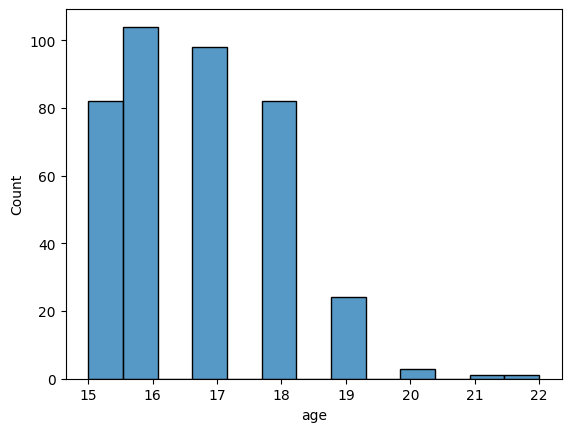

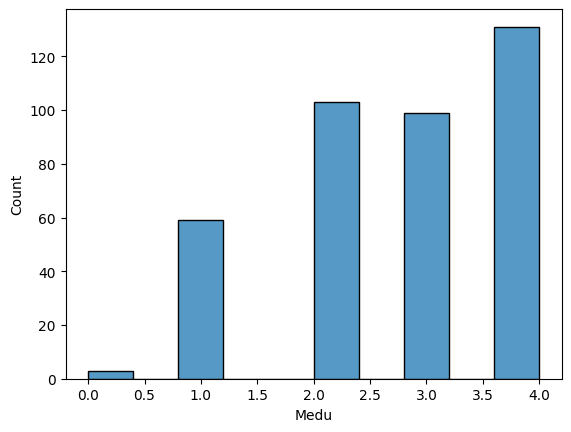

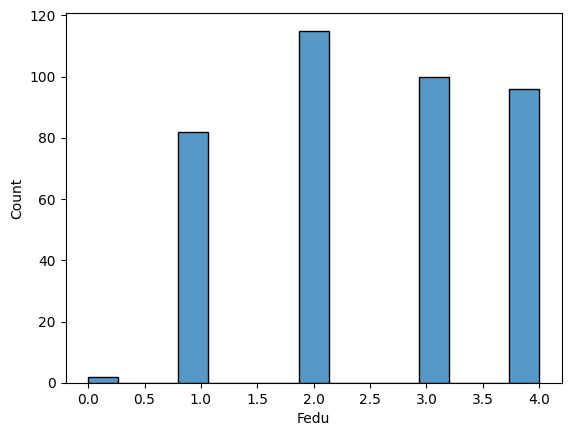

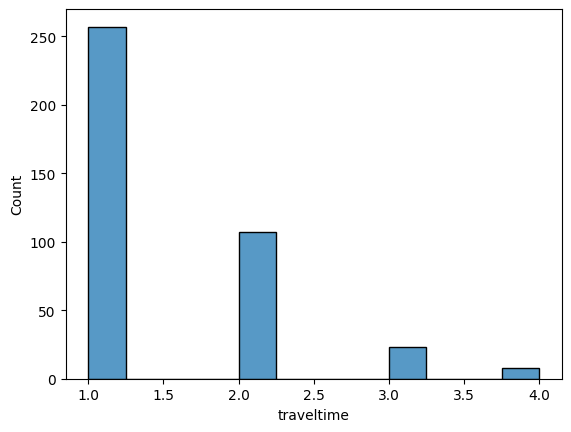

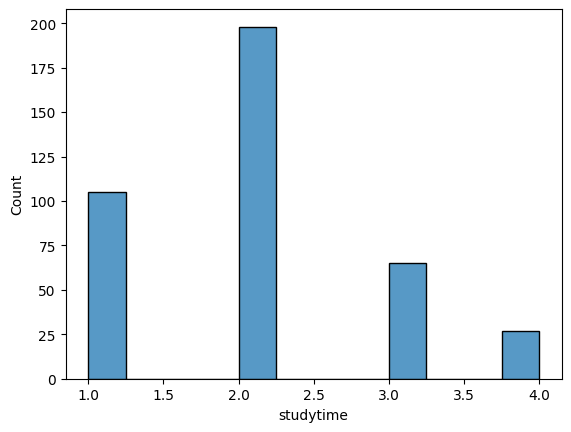

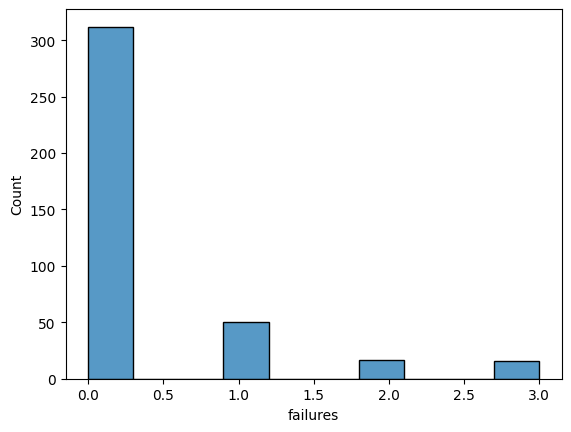

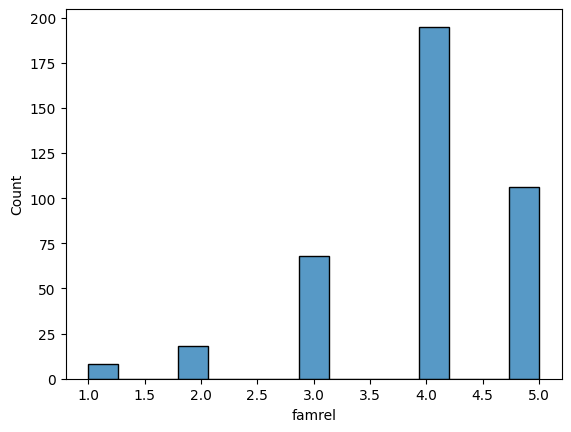

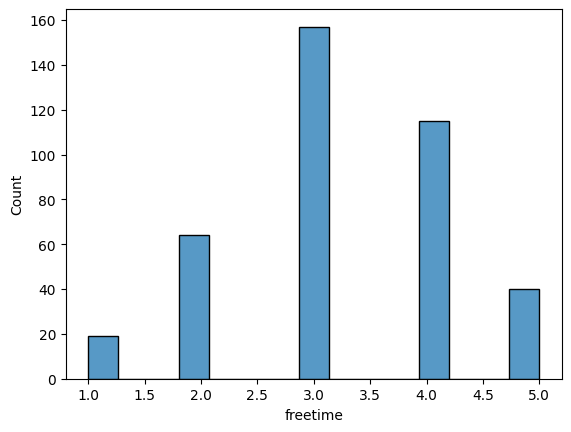

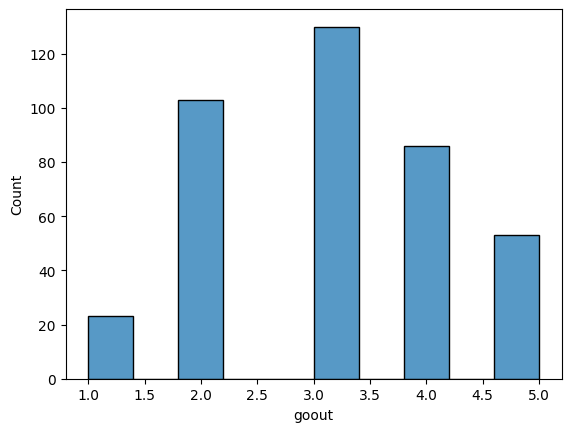

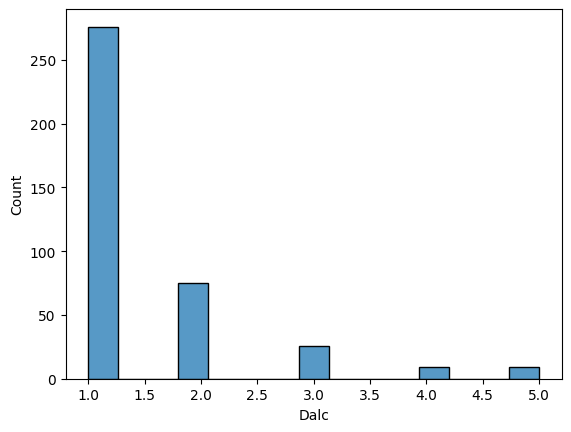

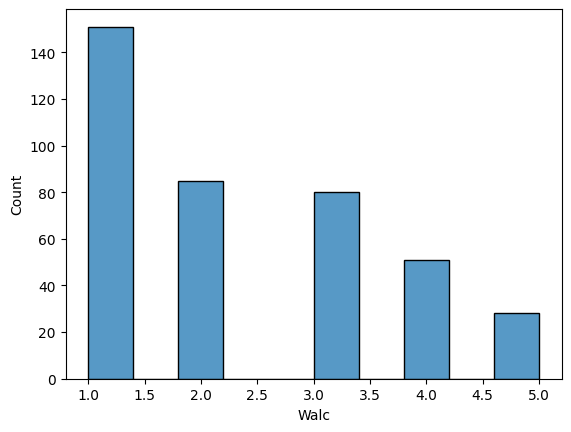

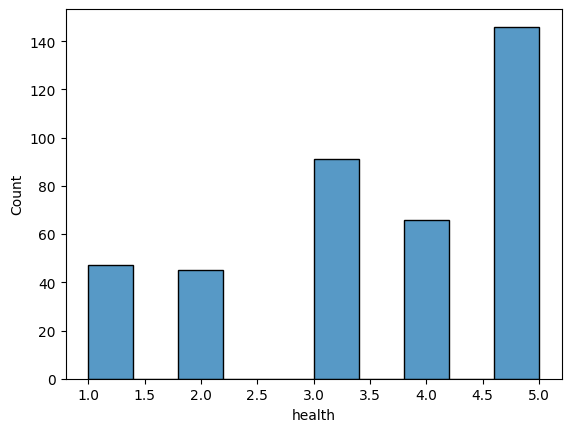

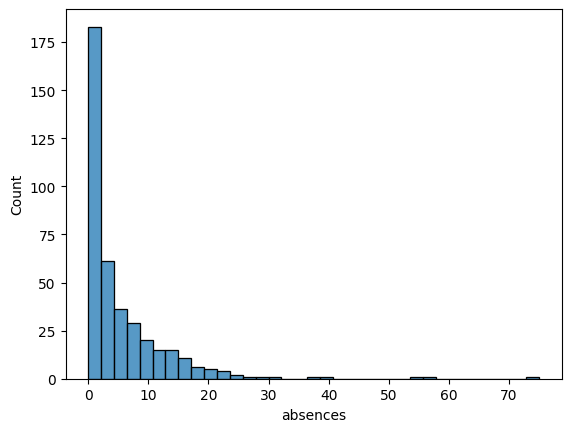

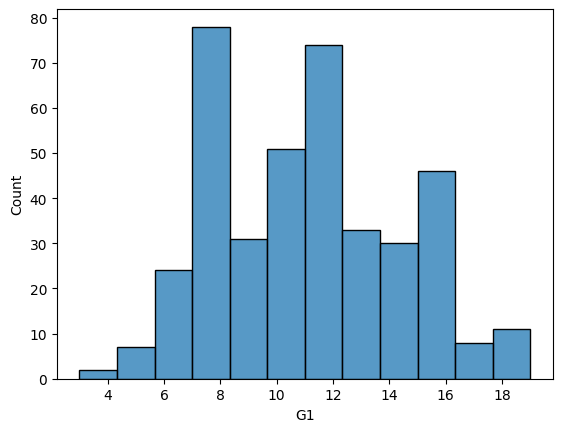

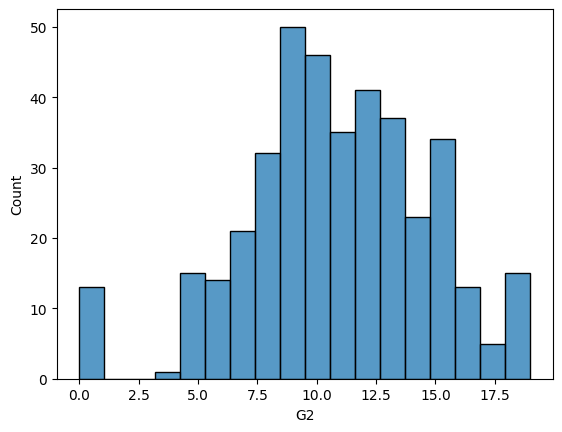

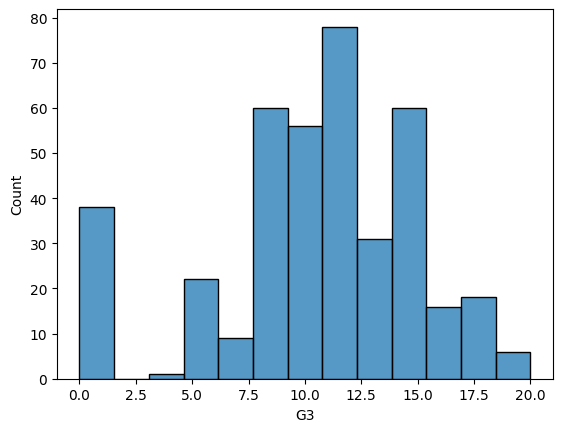

In [14]:
#Histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

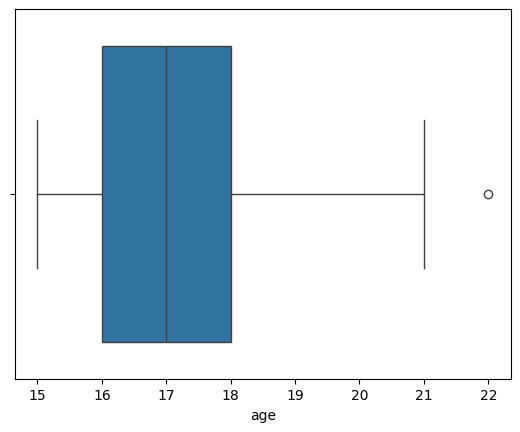

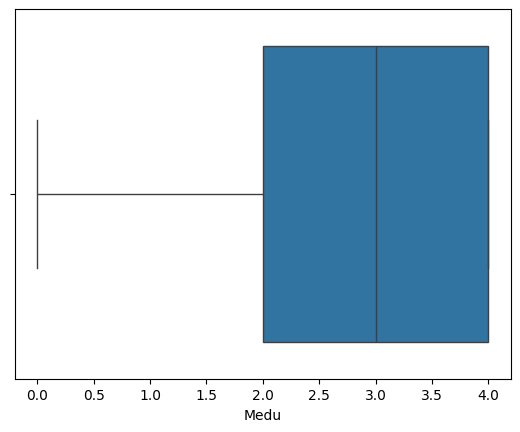

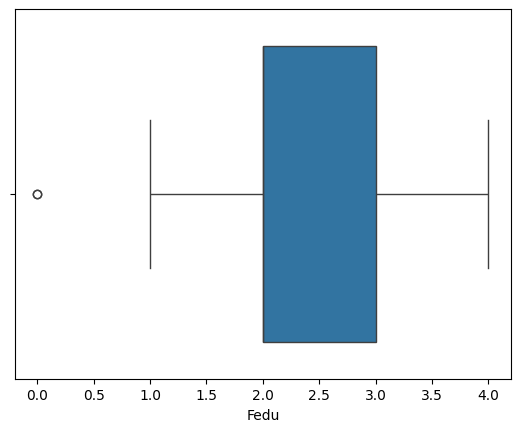

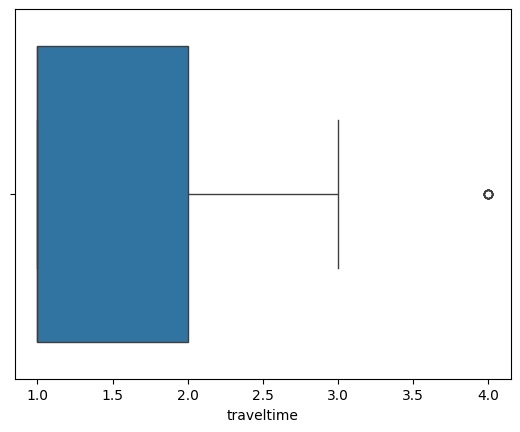

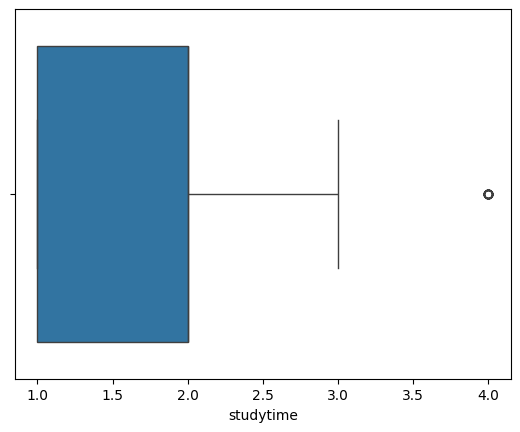

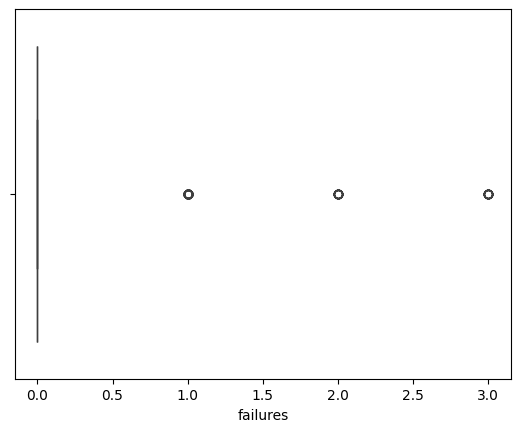

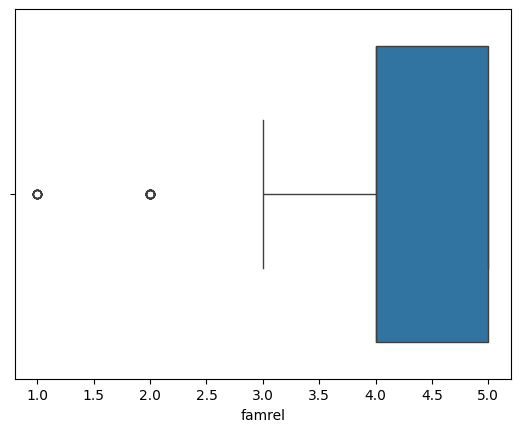

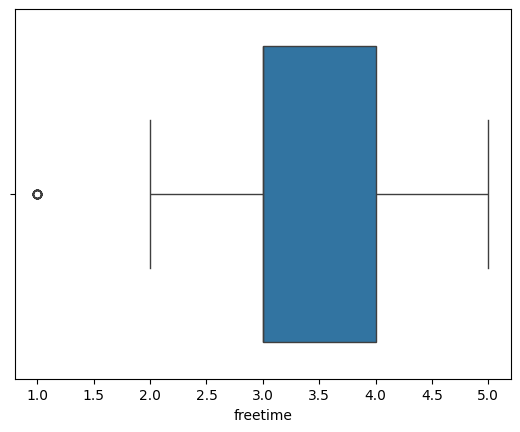

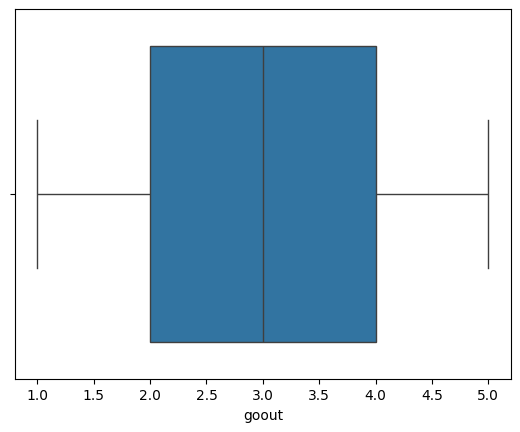

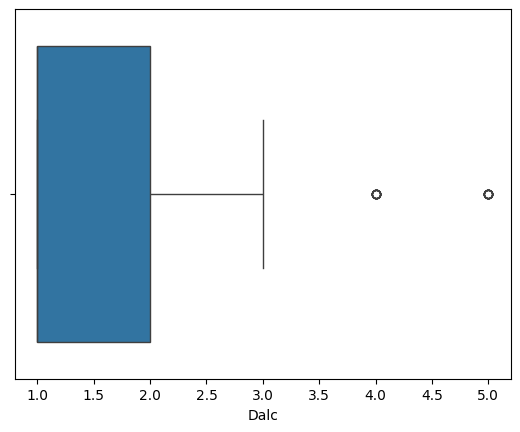

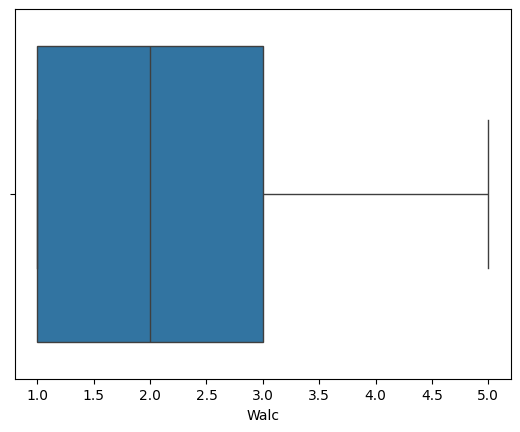

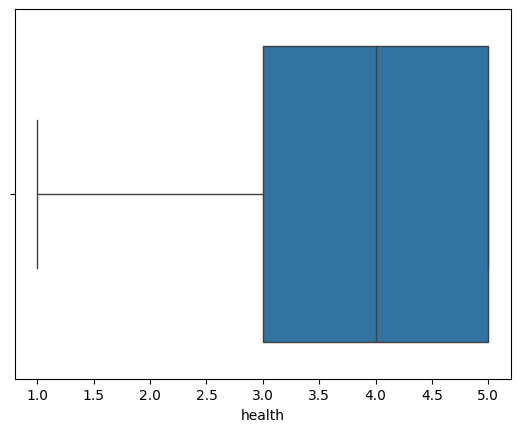

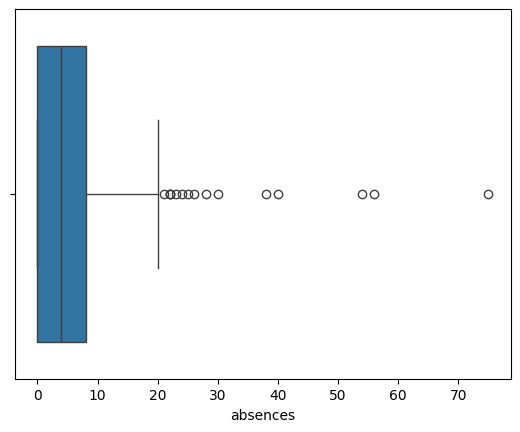

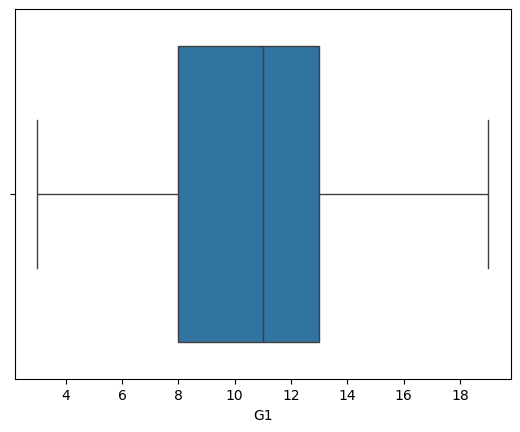

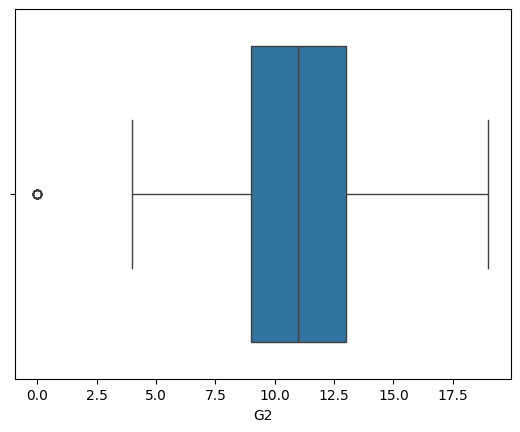

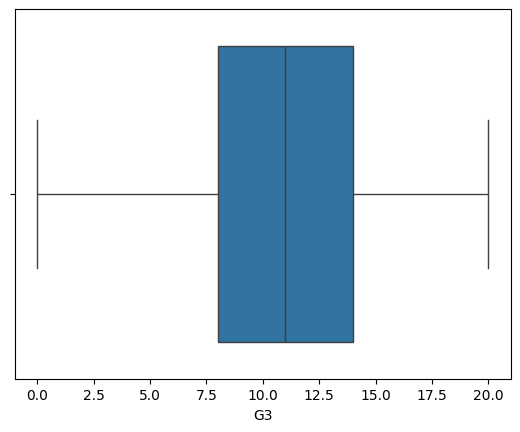

In [15]:
#Boxplot to identify outliers
#An outlier is a data point that significantly differs from other observations in a dataset.
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

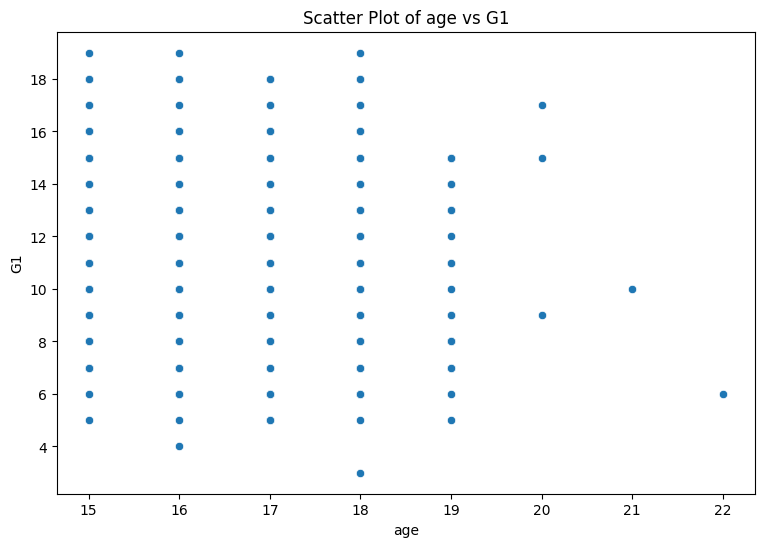

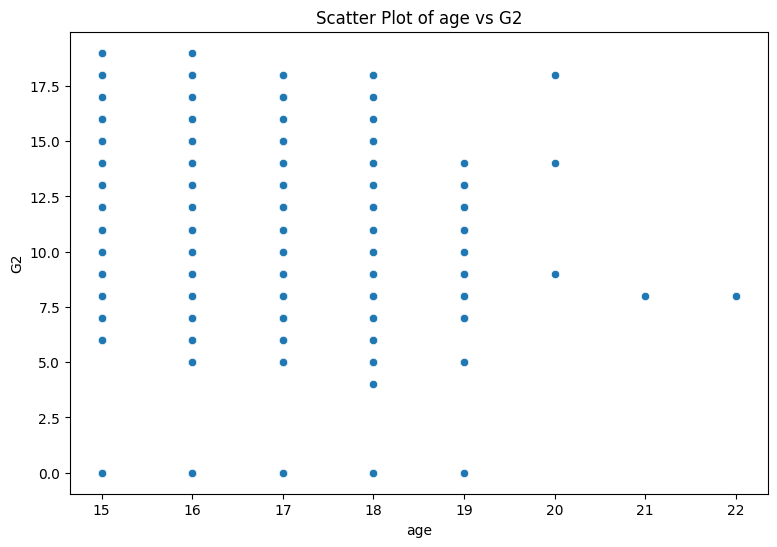

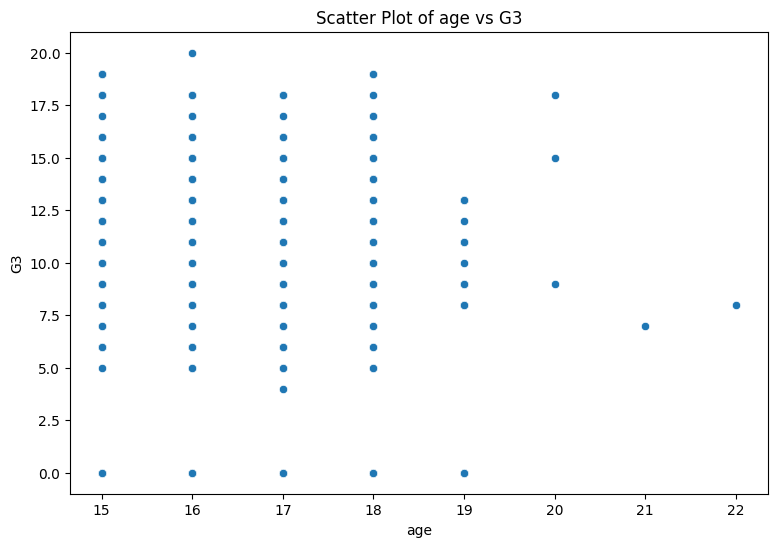

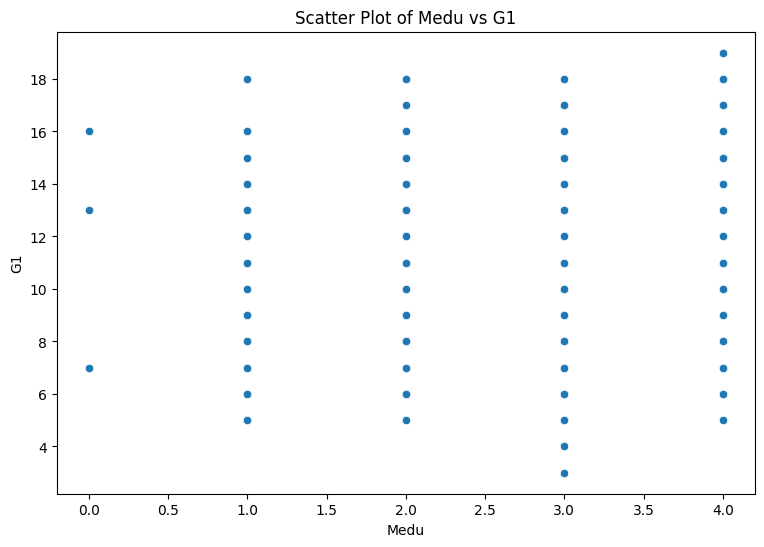

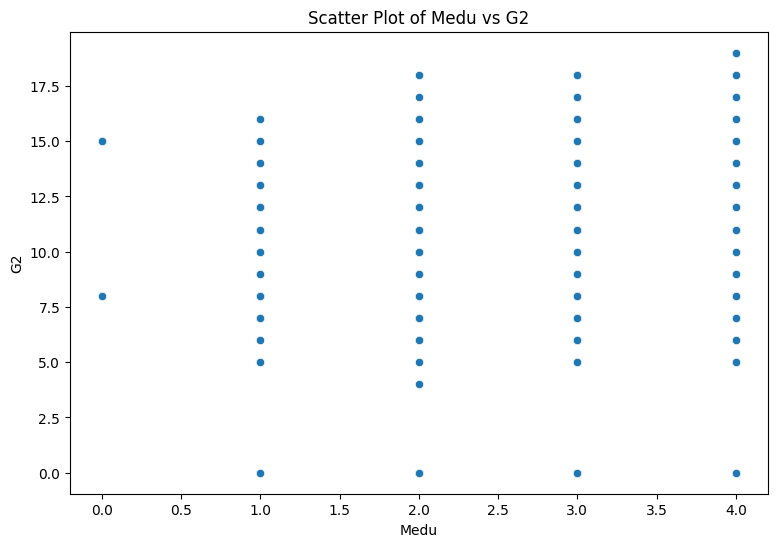

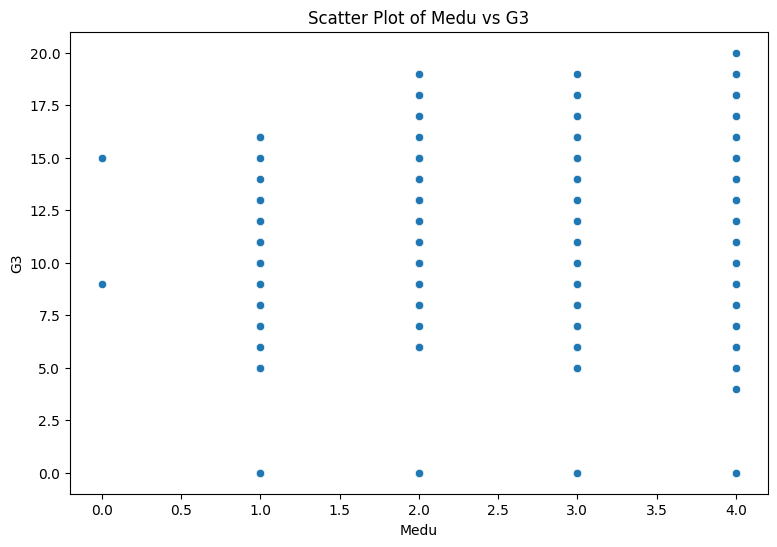

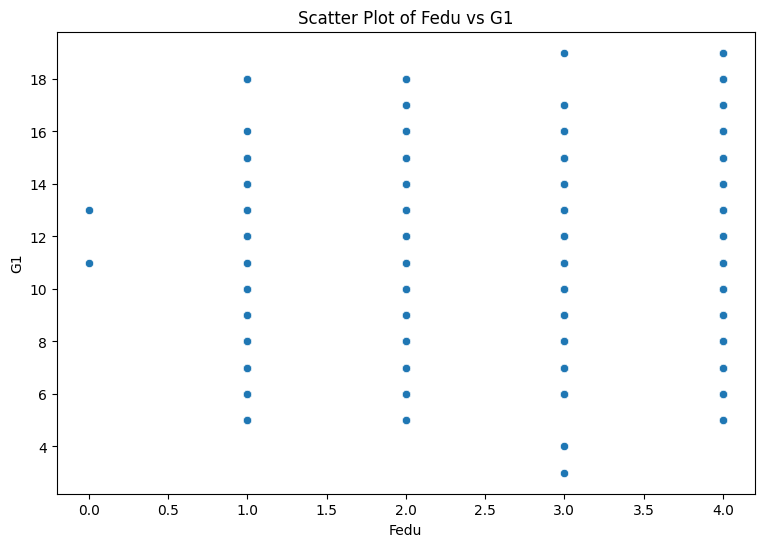

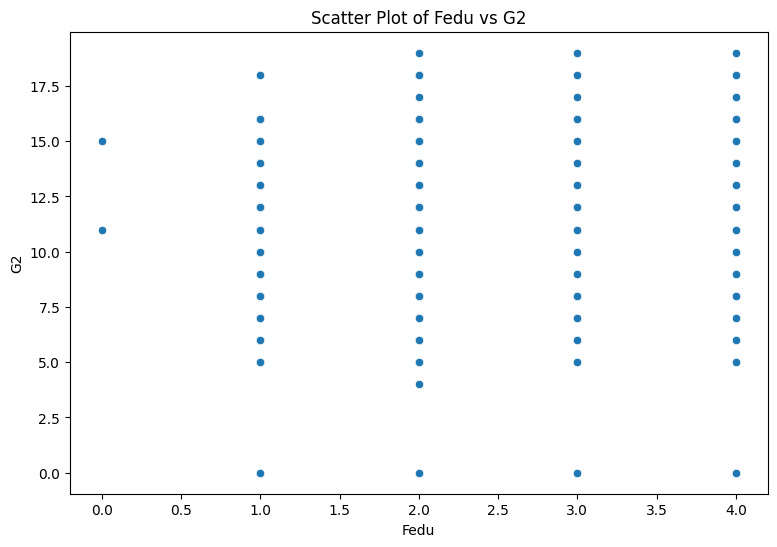

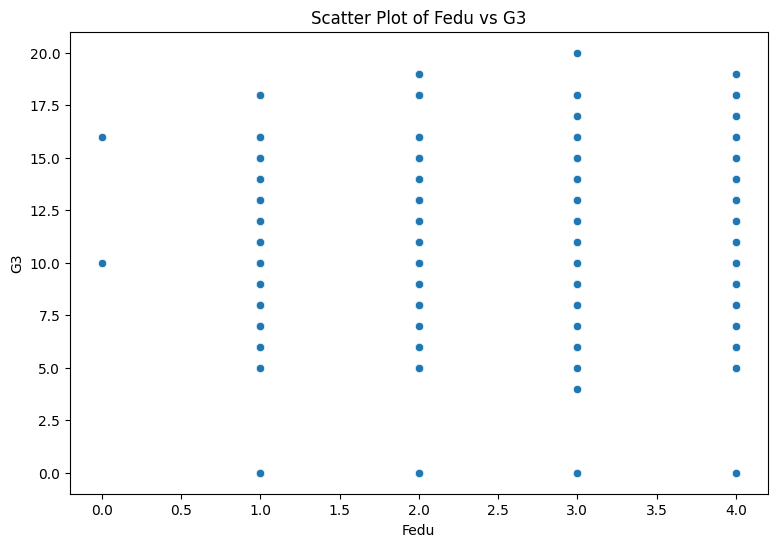

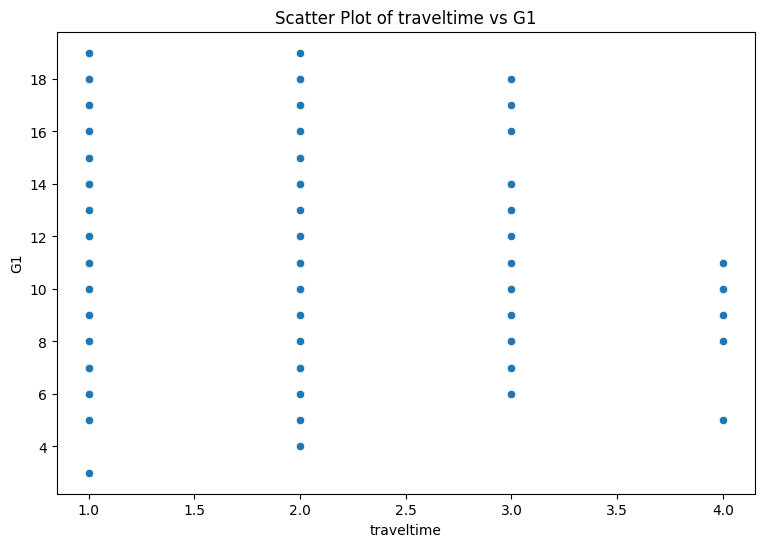

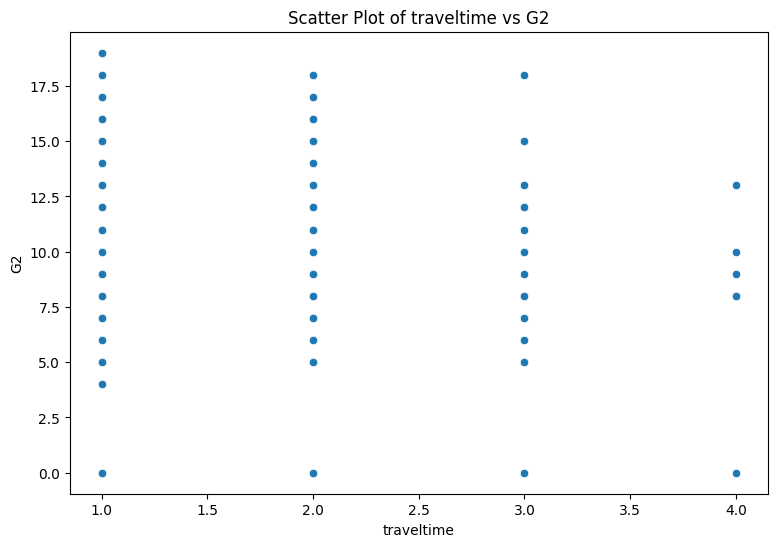

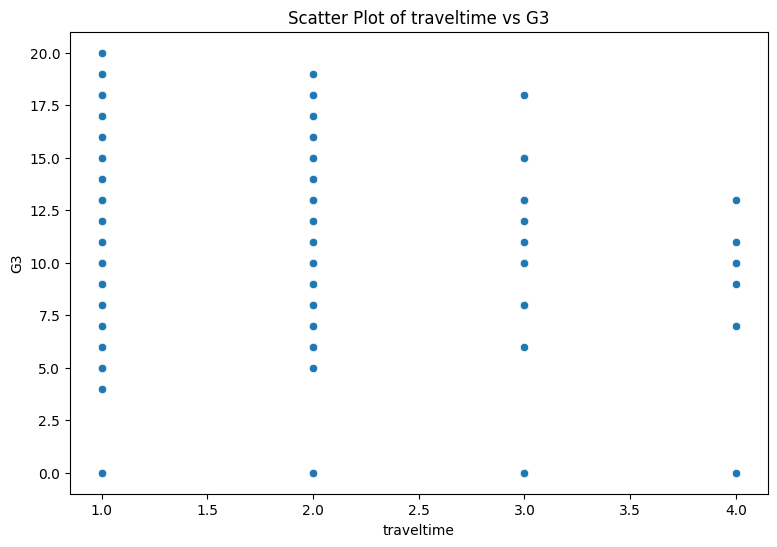

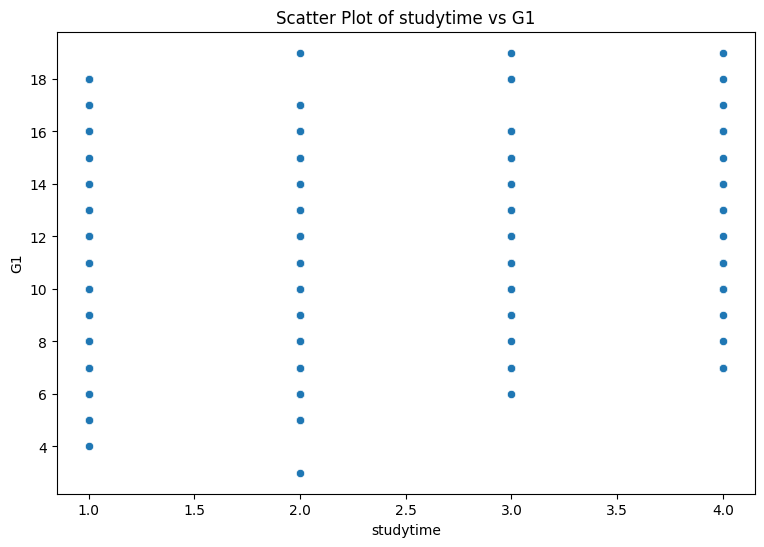

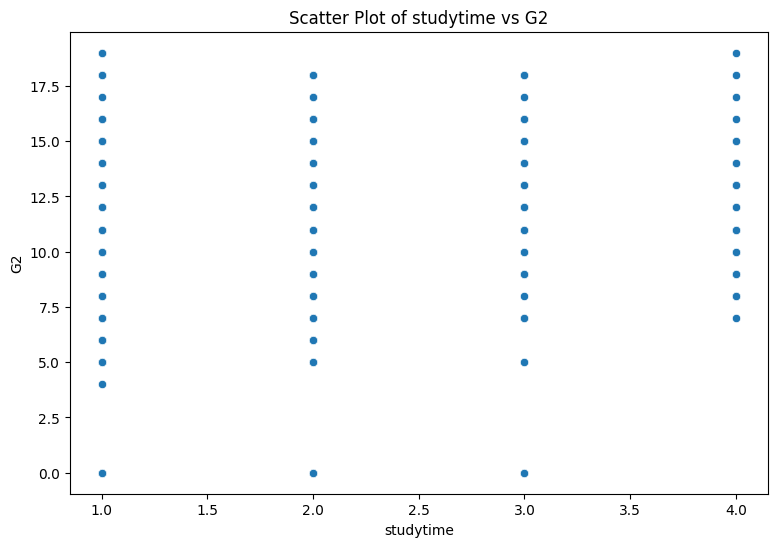

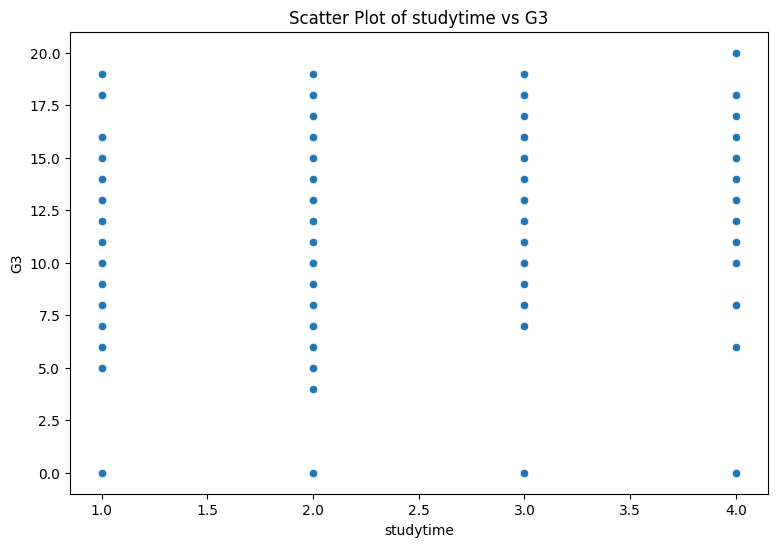

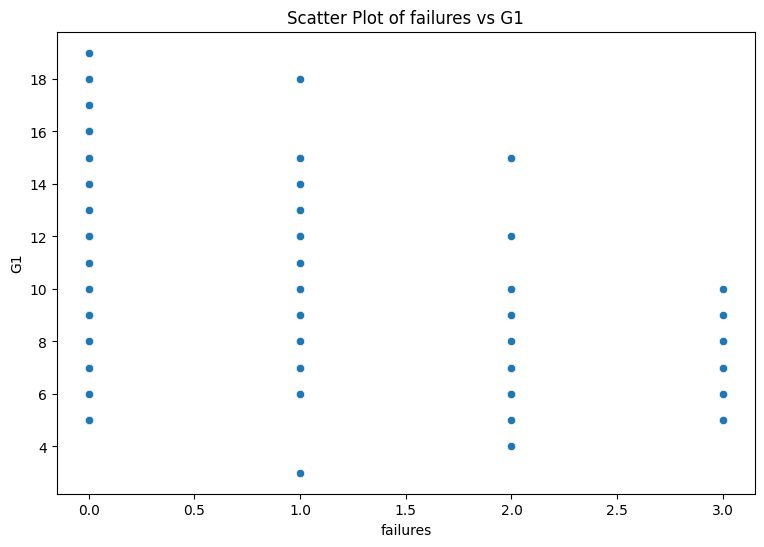

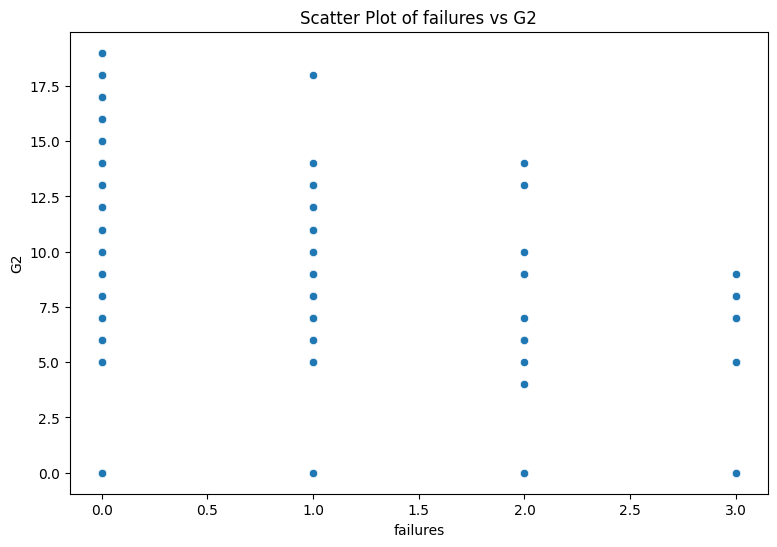

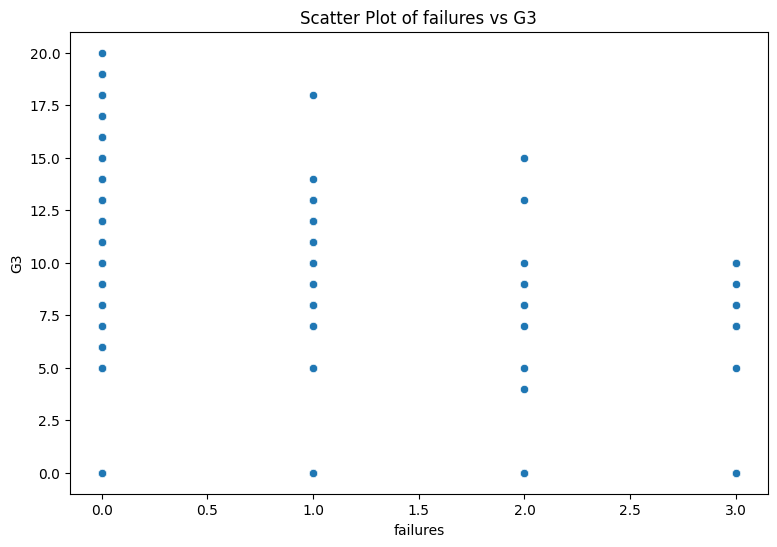

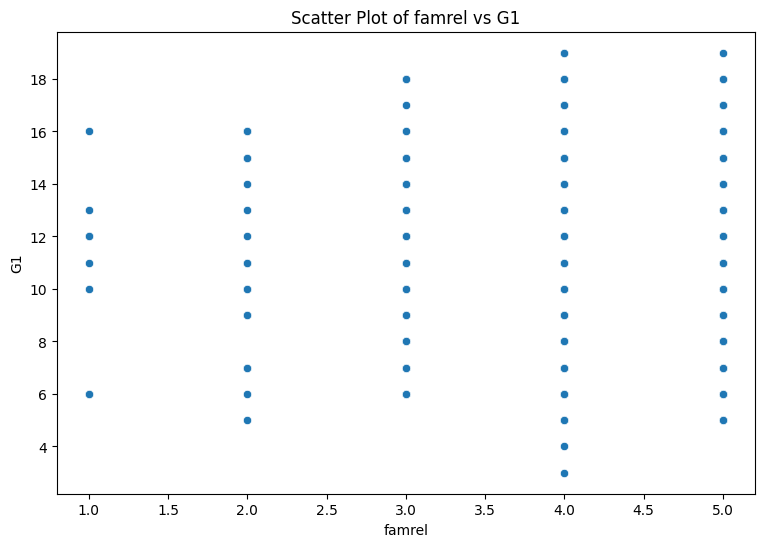

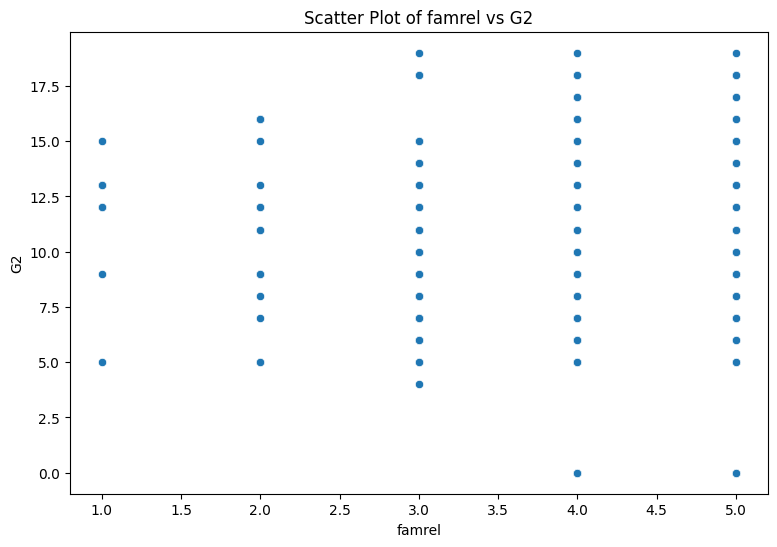

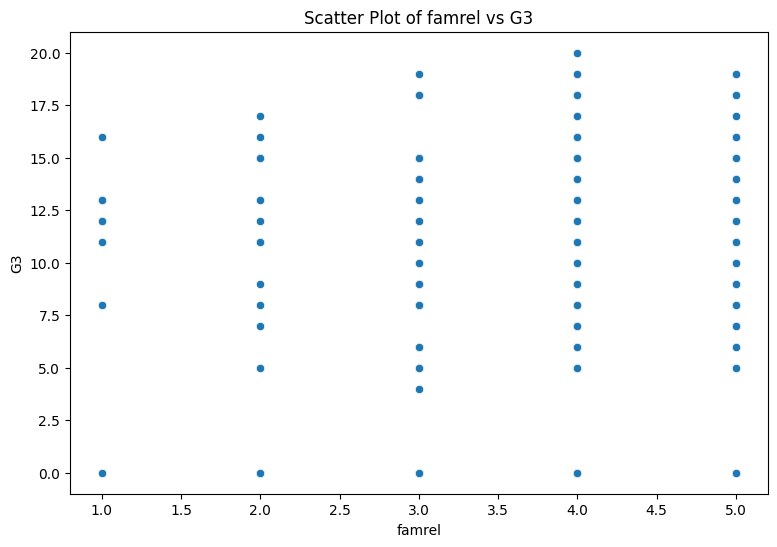

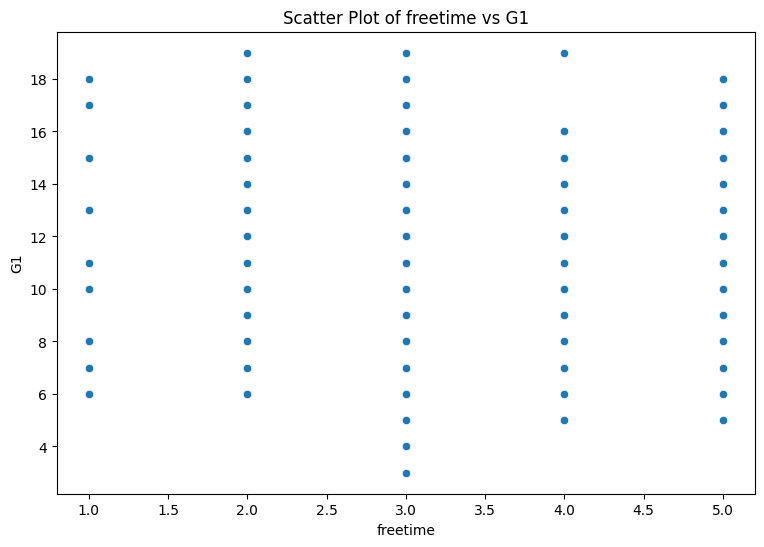

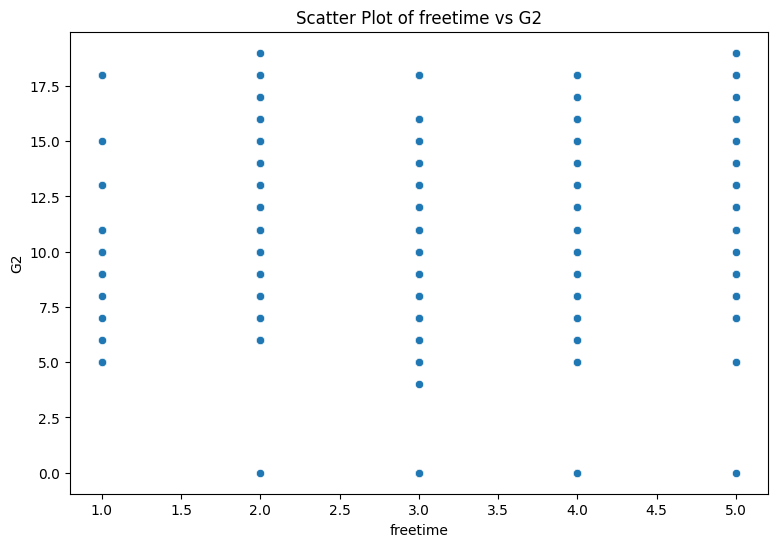

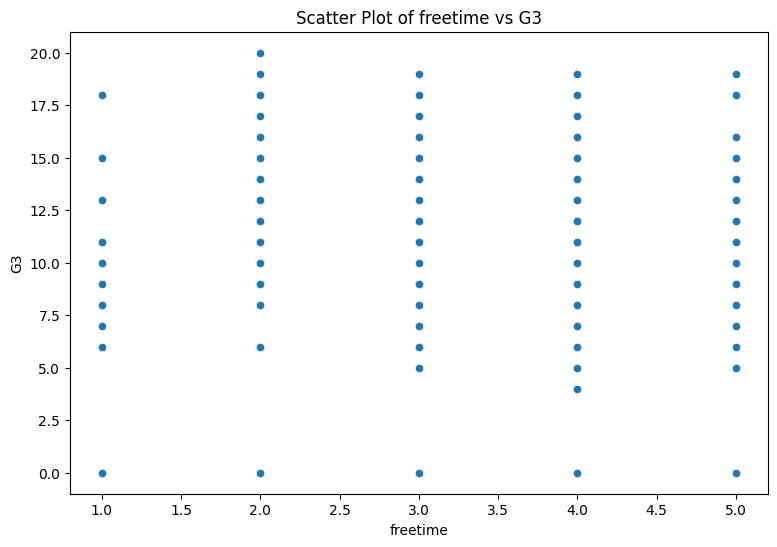

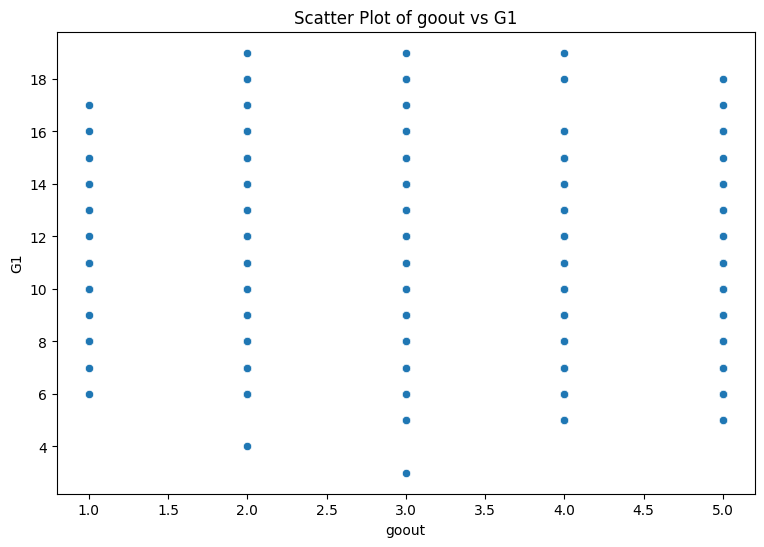

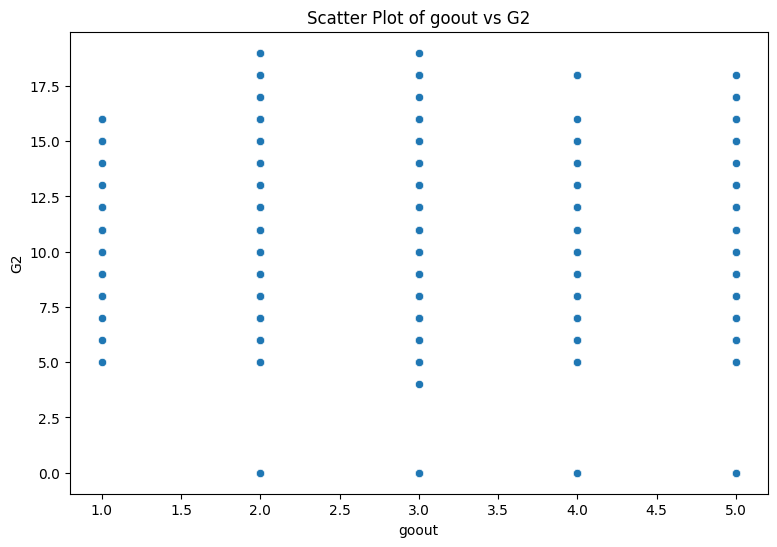

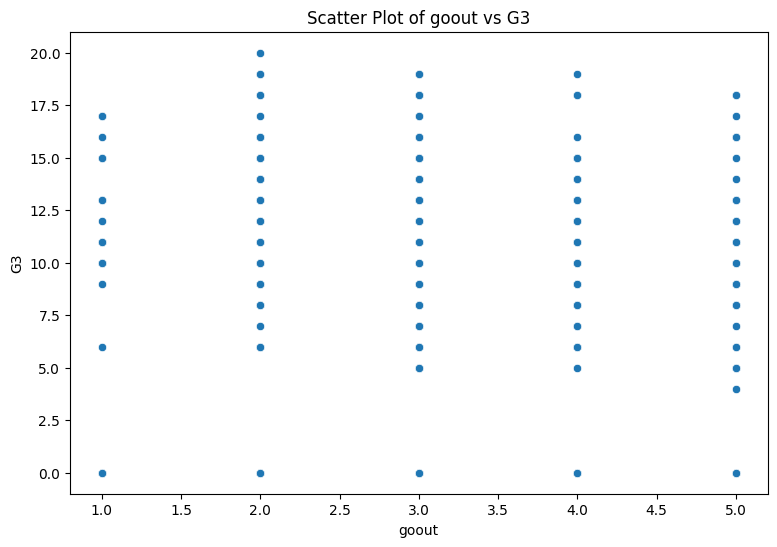

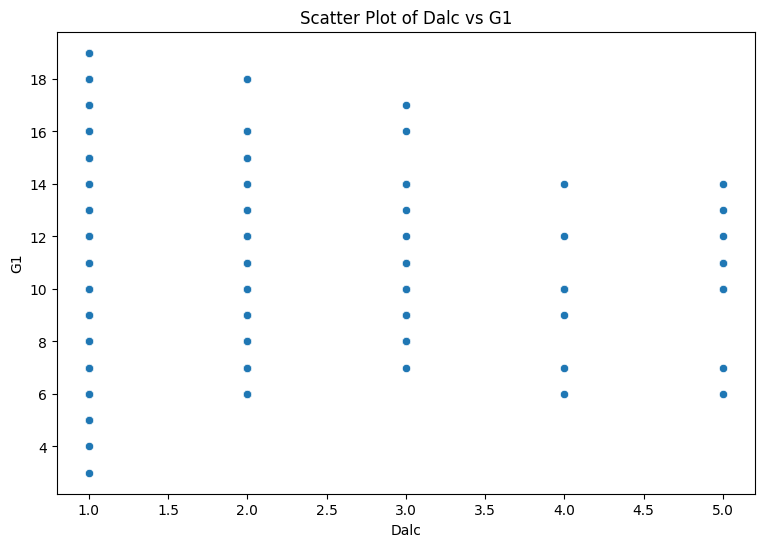

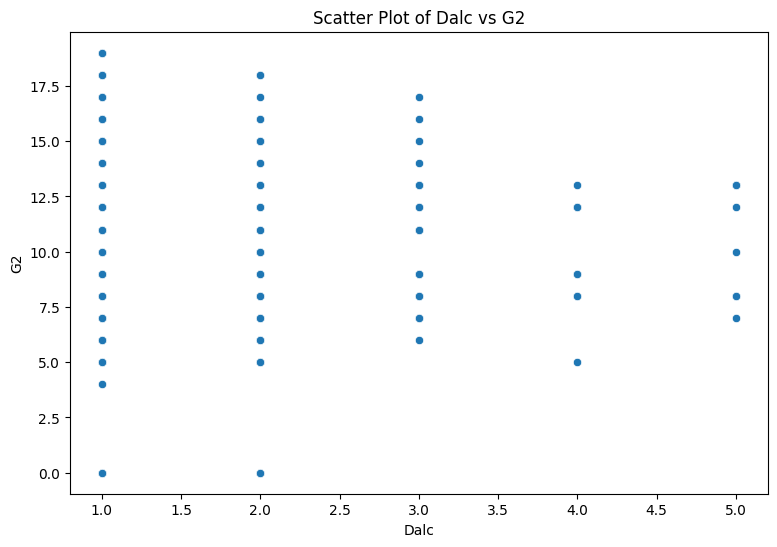

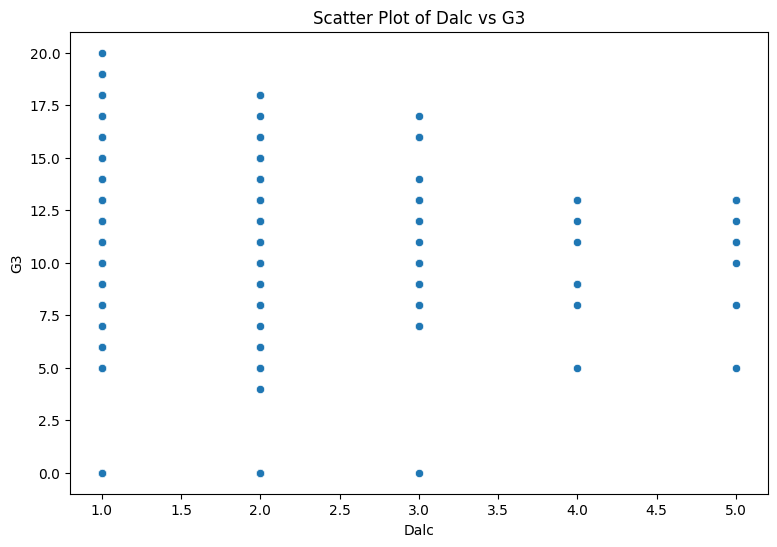

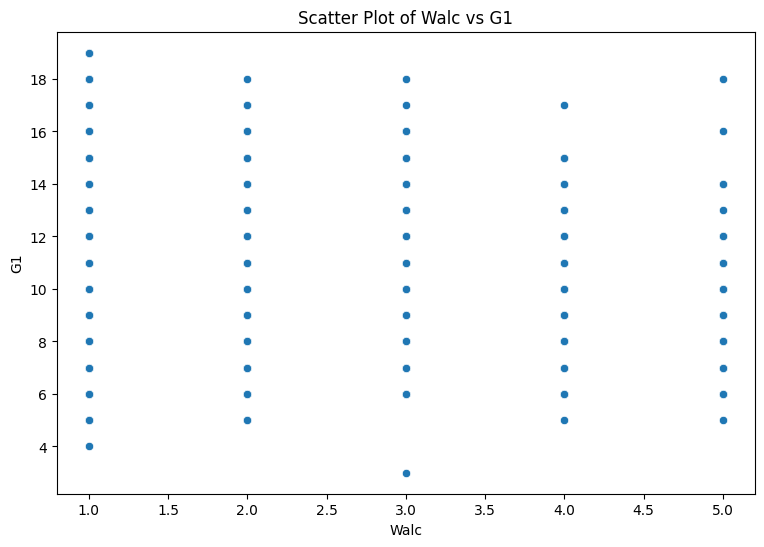

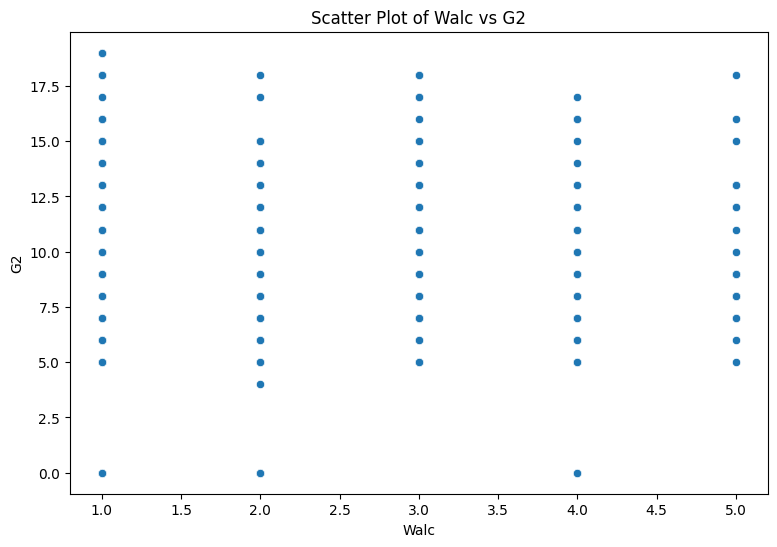

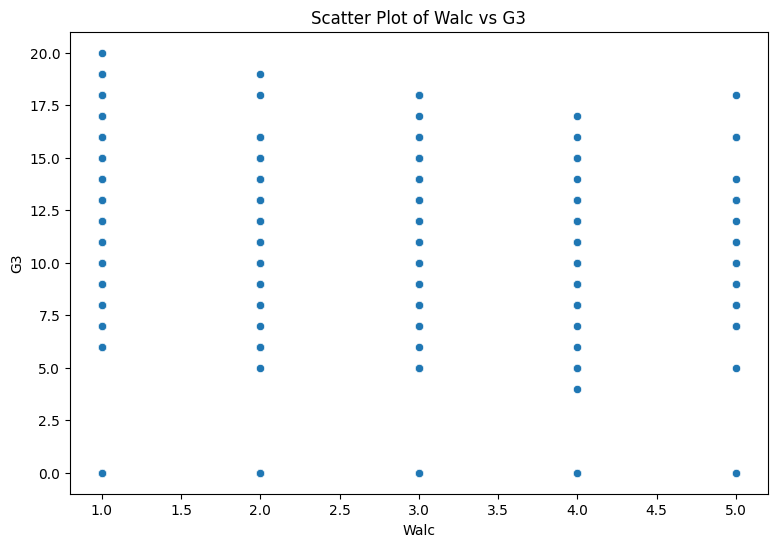

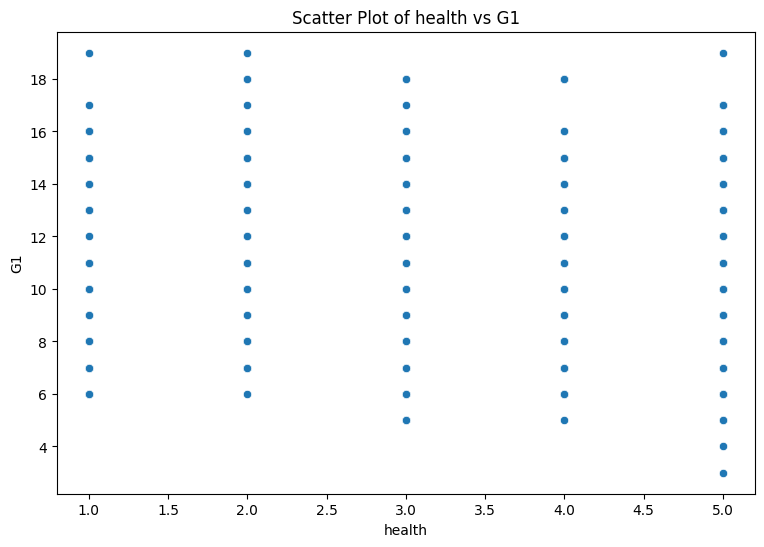

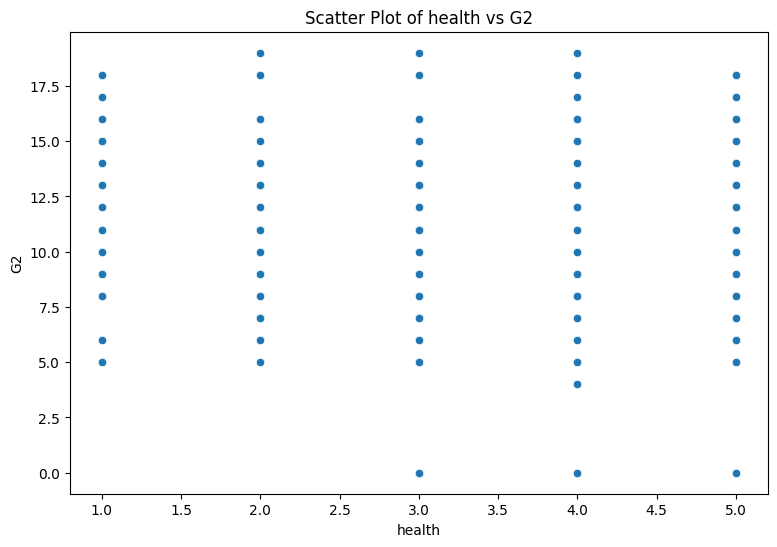

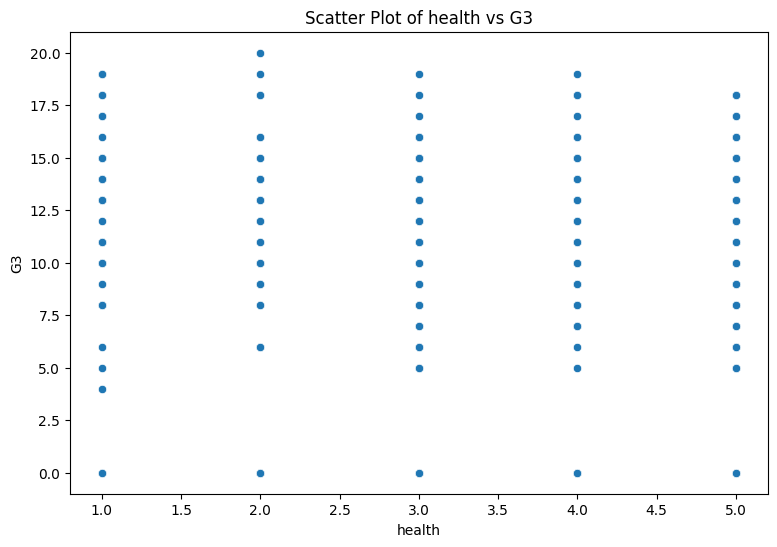

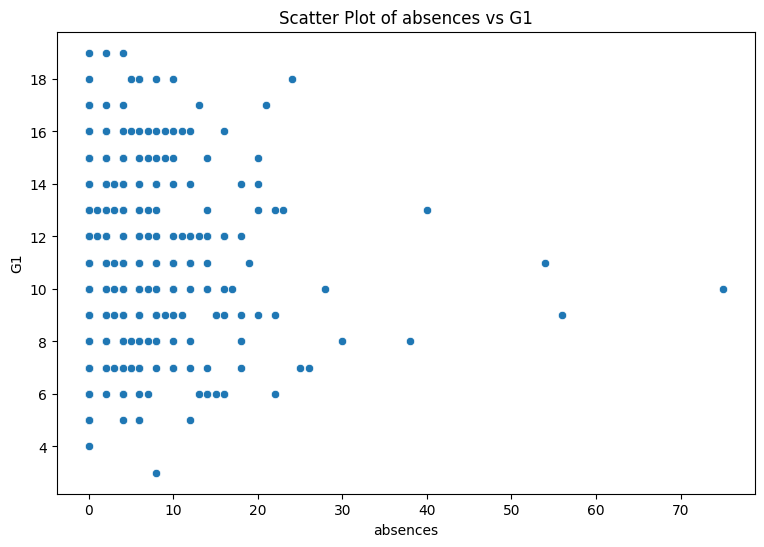

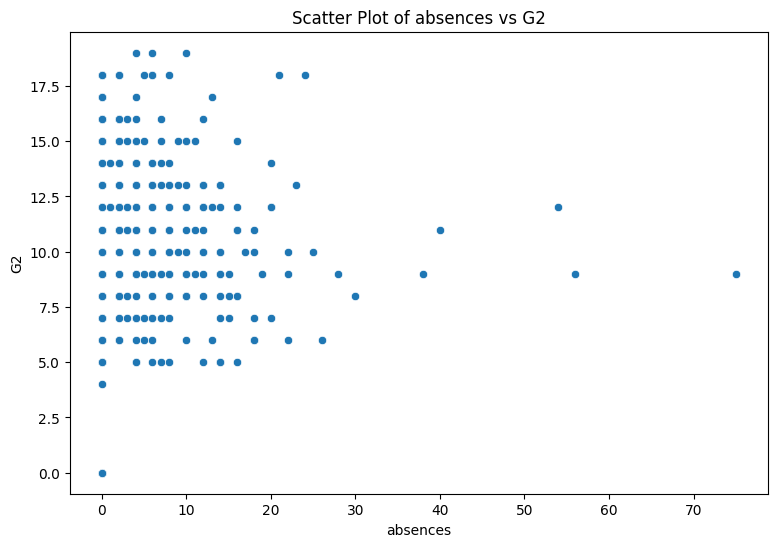

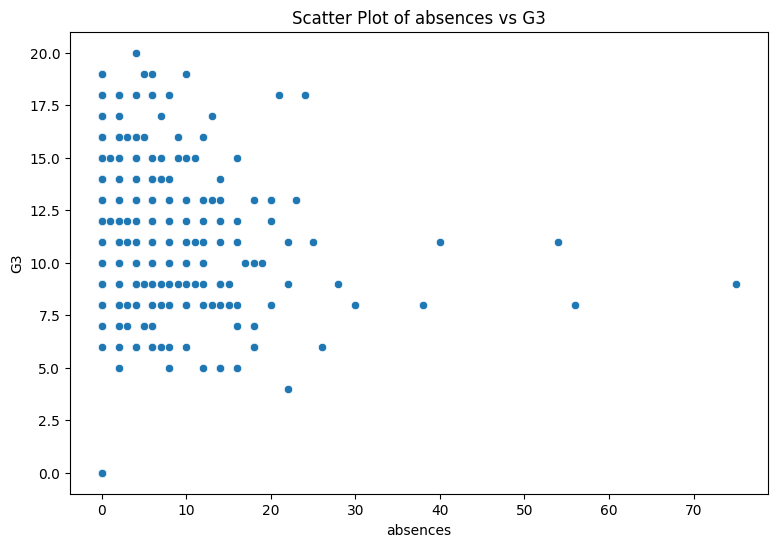

In [16]:
# Scatter plot to understand the relationship
for feature in ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']:
    
    for grade in ['G1', 'G2', 'G3']:  # Separate plots for G1, G2, and G3
        plt.figure(figsize=(9, 6))
        sns.scatterplot(data=df, x=feature, y=grade)
        plt.title(f'Scatter Plot of {feature} vs {grade}')
        plt.xlabel(feature)
        plt.ylabel(grade)
        plt.show()

In [17]:
df.select_dtypes(include="number").columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [18]:
# correlation with heatmap to interpret the relation and multicolliniarity
s=df.select_dtypes(include="number").corr()

<Axes: >

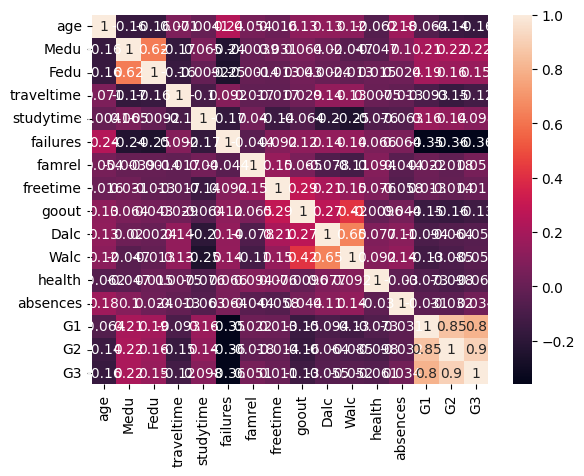

In [19]:
sns.heatmap(s,annot=True)

In [20]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\JK\SCHOOL\4.2\MACHINE LEARNING\STUDENT ALCOHOL CONSUMPTION AND PERFORMACE PREDICTION\student-mat.csv")

In [22]:
# Define the factors to analyze
factors = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
           'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

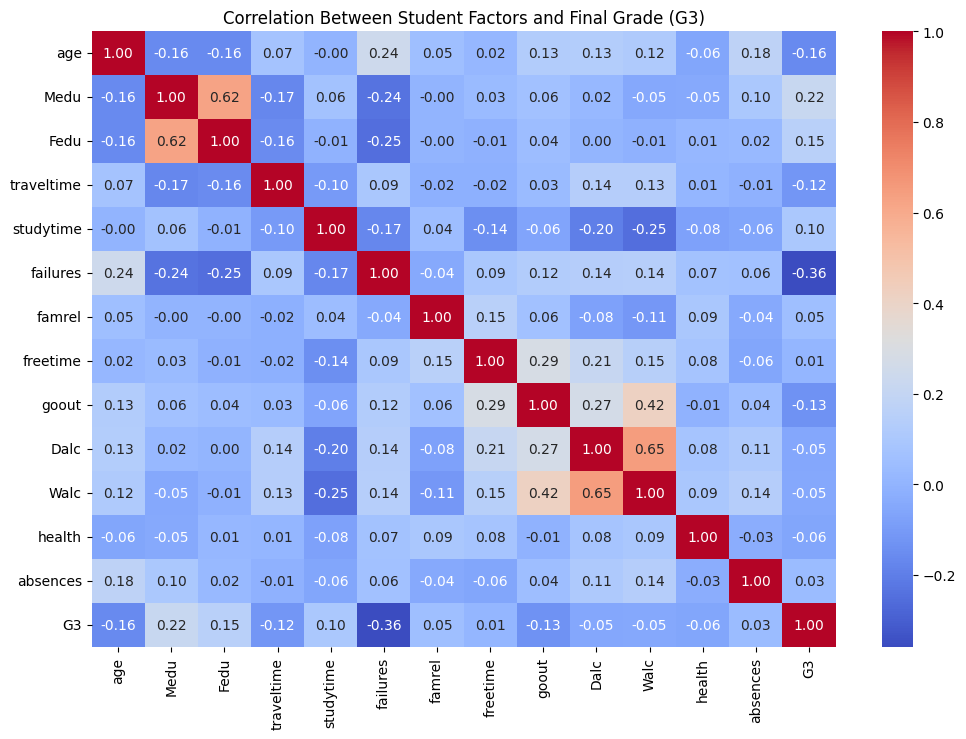

In [23]:
# Correlation Heatmap: Identifying Relationships Between Factors & Final Grade
plt.figure(figsize=(12, 8))
corr_matrix = df[factors + ['G3']].corr()  # Include G3 for correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Student Factors and Final Grade (G3)")
plt.show()

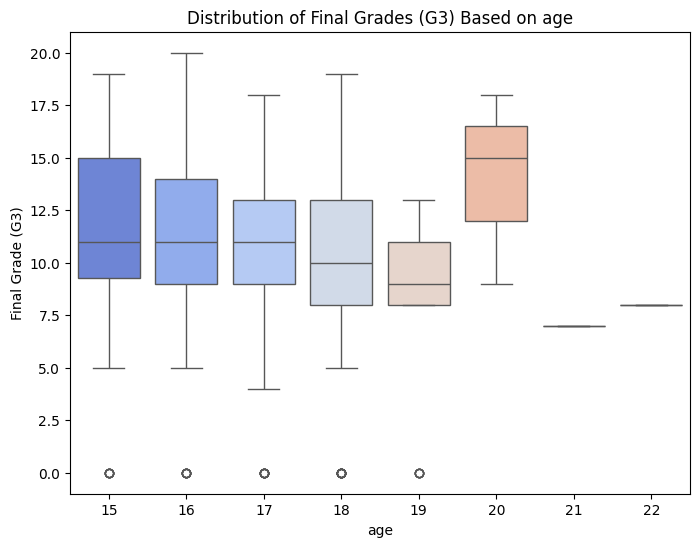

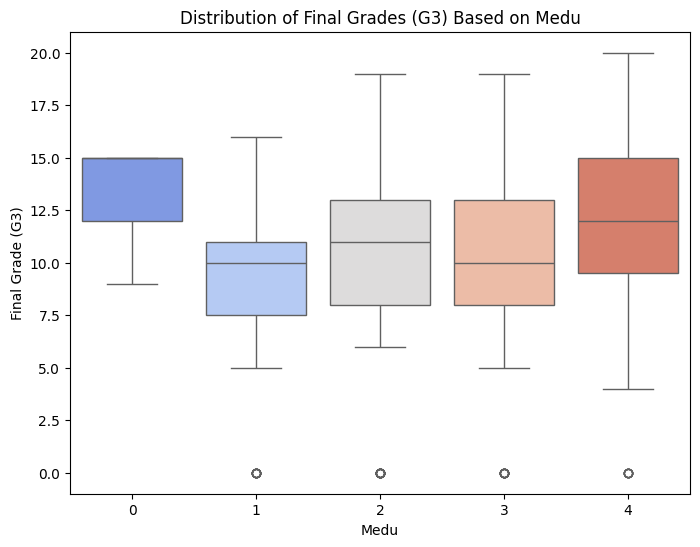

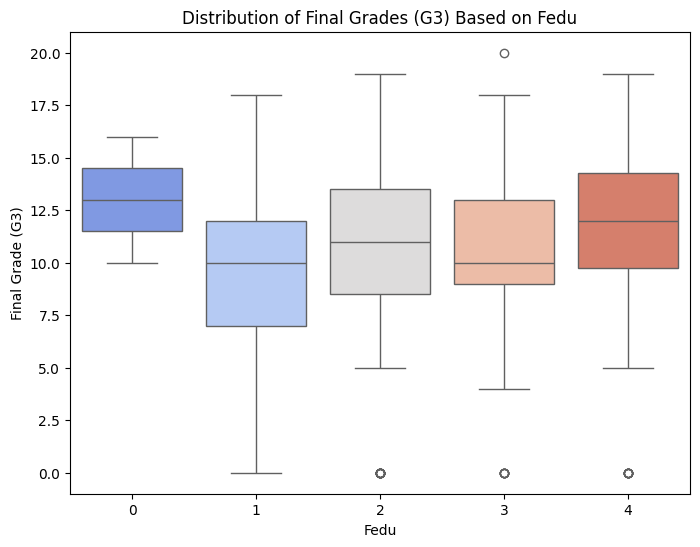

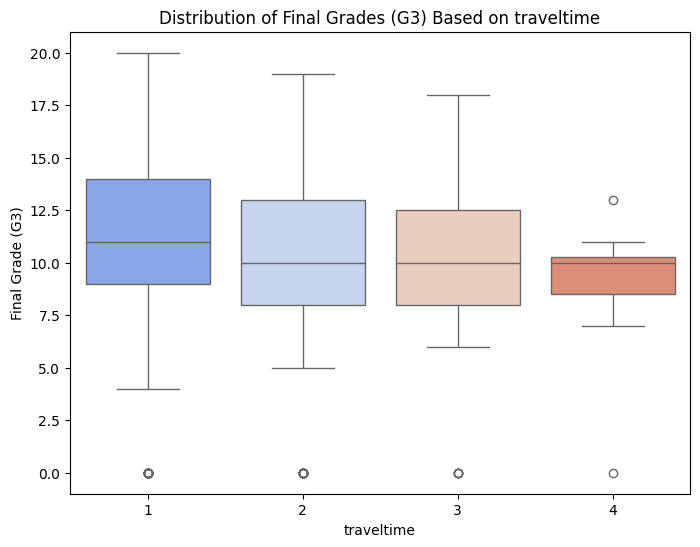

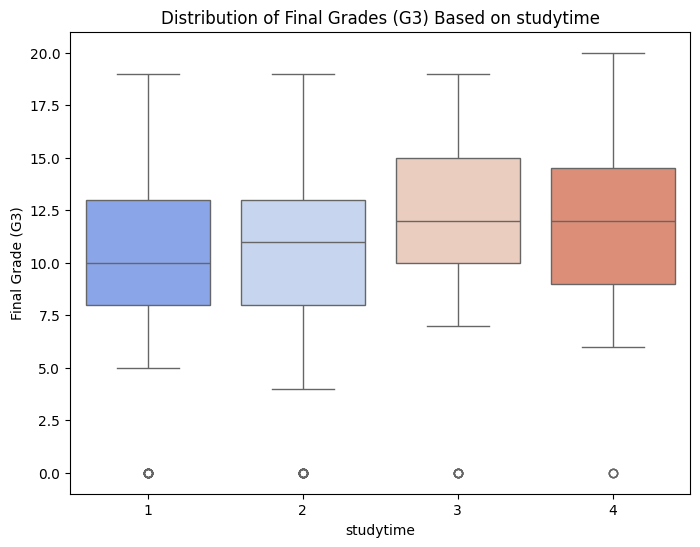

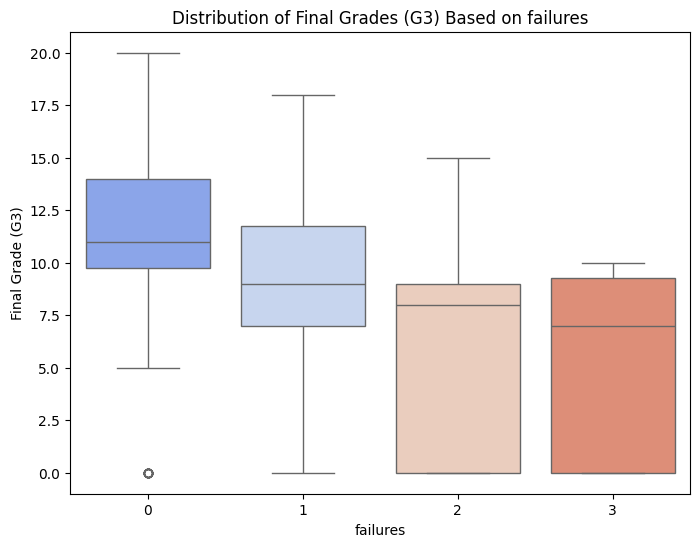

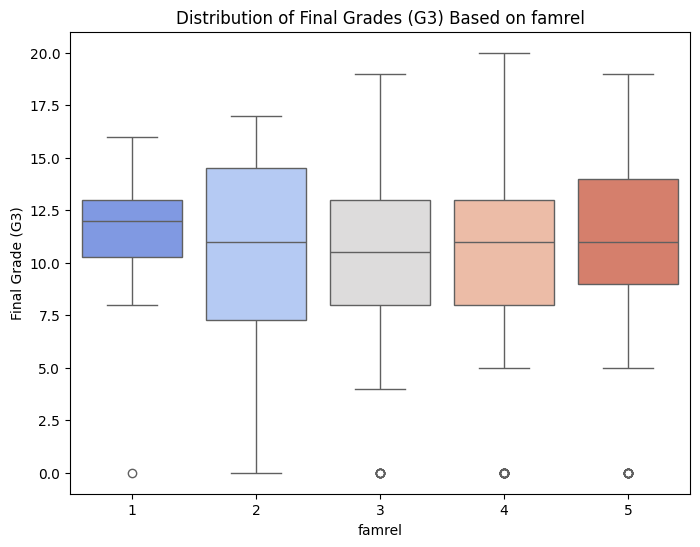

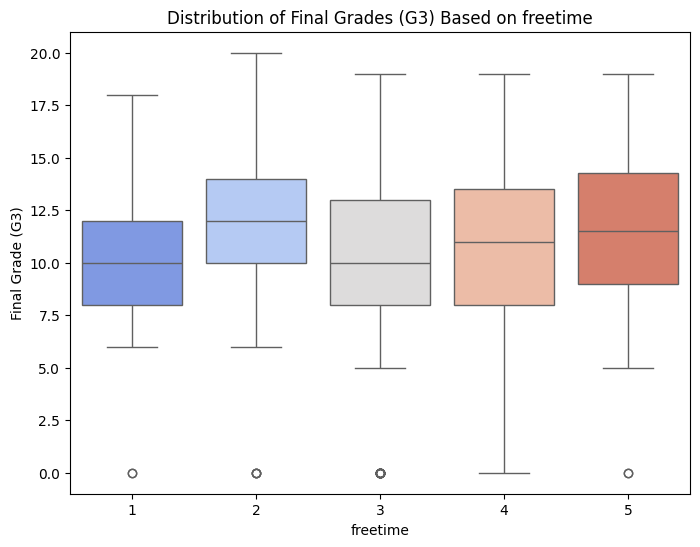

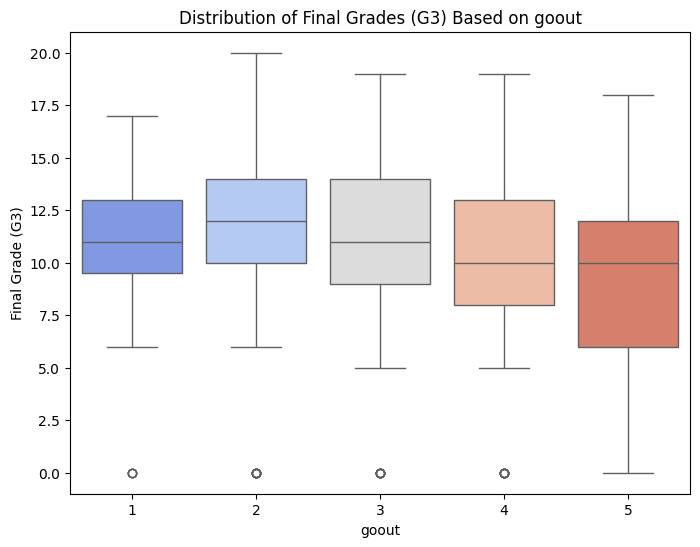

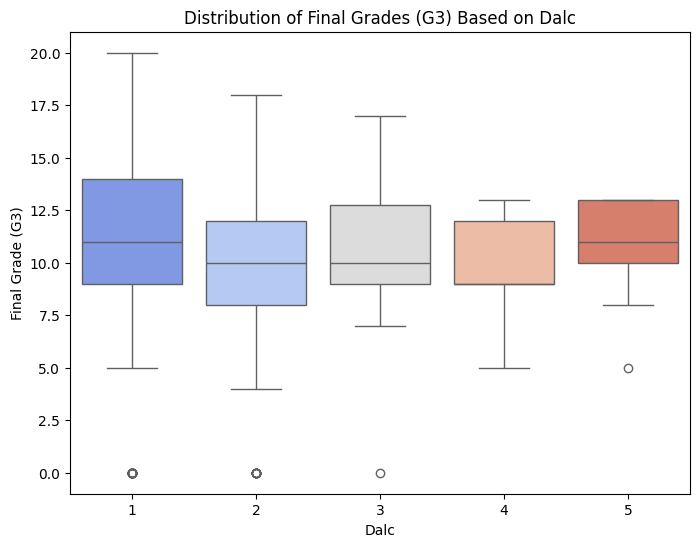

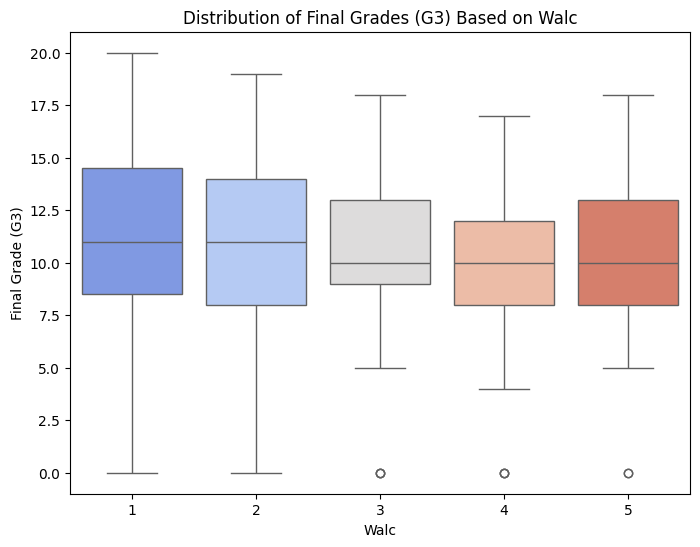

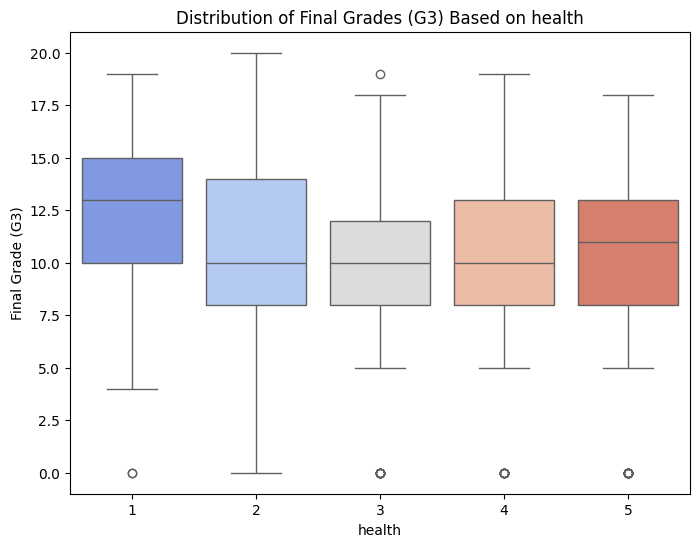

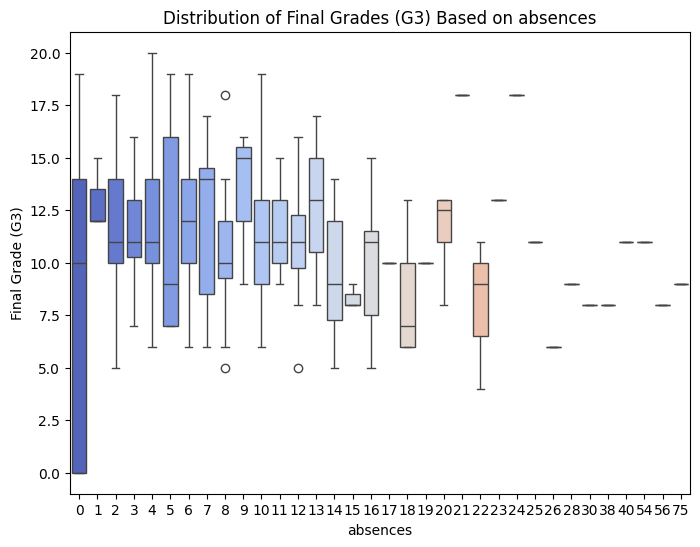

In [24]:
# Boxplots: Understanding Impact of Various Factors on Final Grade (G3)
for factor in factors:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[factor], y=df["G3"], palette="coolwarm")
    plt.title(f"Distribution of Final Grades (G3) Based on {factor}")
    plt.xlabel(factor)
    plt.ylabel("Final Grade (G3)")
    plt.show()

In [25]:
# Pie Chart: Student Grade Distribution Based on Alcohol Consumption (Dalc)
labels = ['1', '2', '3', '4', '5']  # Dalc scale (1 = very low, 5 = very high)
colors = ['lime', 'blue', 'orange', 'cyan', 'red']
explode = [0, 0, 0, 0, 0]

In [26]:
# Calculate total grades for each level of alcohol consumption
sizes = [df[df.Dalc == i]['G3'].sum() for i in range(1, 6)]

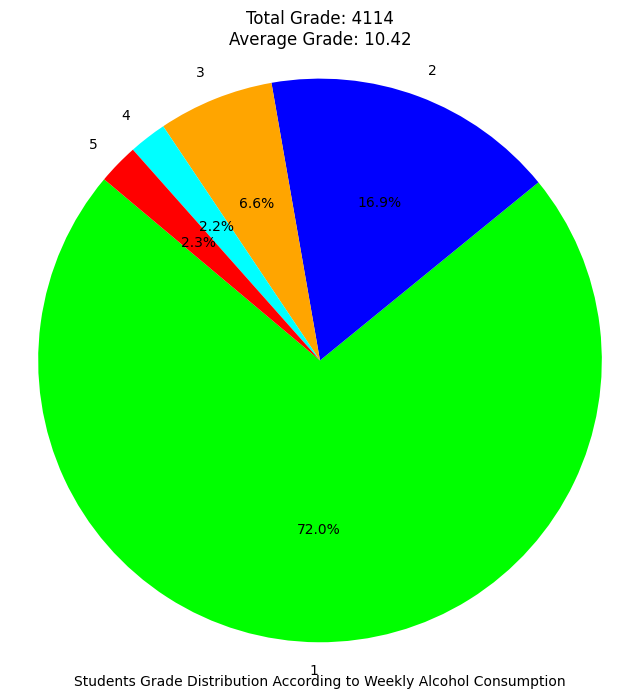

In [27]:
# Ensure no division errors
if sum(sizes) > 0:
    total_grade = sum(sizes)
    average_grade = total_grade / len(df)

    # Plot Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Ensures pie chart is circular
    plt.title(f'Total Grade: {total_grade}\nAverage Grade: {average_grade:.2f}')
    plt.xlabel('Students Grade Distribution According to Weekly Alcohol Consumption')
    plt.show()